In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random

# Resampling from multiple populations.

Today's example is from my own work. Trying to understand how we are doing in educating student at UNC. This is also an example where we are going to simmulate the data rather than work with real data. One reason for this is that I want to show you exactly what is happening, and the other is that in doing research on human subjects, you need to be respectful of their data and privacy. We can understand what we need to from the problem using simmulated data, and sharing the actual data could potentially be a concern.

## Grades in Courses

The university is very concerned with passing rates in our courses and occasionally that concern comes down to individual sections of a multi section course. For example we offer 5-8 sections of MATH 120 - *Mathematics for Liberal Arts* each semester. The question is sometimes, did one section have particularly low or high grades because of something the instructor did, the time of day it was offered, or some other factor.

These things absolutely have an effect. But sometimes the variations in distributions of grades that are observed across sections are just because of the randomness with which students divide themselves up into sections.

I also want to demonstrate how we can do these experiments without building up the whole population like we did last week. We will need to do this using random sampling with replacement. 

## With Replacement

So last week most of our examples used random sampling without replacement. The difference is in whether when we select an individual for our sample, whether we return them to the population (replace them) or not. If the size of the sample we are taking is large compared to the size of the population (Nixon's pardon petitions for example) then sampling without replacement should be used - our sample is large enough that as it is built it is changing the distribution of the population. But in cases where the sample is much smaller than the population, sampling with replacement is good enough -- what we need to know is that building the sample is not changing the distribution significantly. How small is small enough? It depends on how large the smallest category within the population is that we are trying to study. If the category is small enough that losing members to the sample we are selecting would change their proportion significantly, then we should sample without replacement to take it into account.

## The Population

So over the last six years MATH 120 has had the following distribution of grades 11% A; 27% B; 30% C; 15% D; and 17% F (again completely made up numbers) for a large population of students (close to 1000). A section of 25 students is found to have 9 A, 6 B; 6 C; 2 D; and 2 F. A slightly better than average performance for the class. 


### Our Null Hypothesis:  This distribution of grades is the result of randomly chosing 25 students from the total student population with the grade distribution above.

### Our Alternative Hypothesis: This distribution of grades is the result of something being different about this section. 

In particular if we know that the only thing different about this section is that the instructor gave them all a piece of chocolate at the beginning of each class, then our conclusion in the alternative would be that the chocolate improved how the students did in the class.

----

### The Test Statistic

It is not so clear what to use as the **Test Statistic** here. The test statistic is the thing we will compute from our sample to compare.

Last week we used:

- For the Pitchers/NonPitchers we used the median and mean of their heights (and note that we came to opposite conclusions!)
- For Nixon it was the proportion of the petitions received who were granted pardons.
- For the PPP loans it was the mean number of jobs saved by the largest loans.
- For the airlines it was the median and mean arrival delays of the sample.

There are not necessarily rules, but some guidelines:

- The test statistic should be meaningful for the problem - and in particular should give you in the Null or Alternative a conclusion.
- For numerical data median and mean are common, other test statistics that might be useful would be standard deviation or other measures of spread such as a specific quartile. Even minimum or maximum might be appropriate depending on the problem. 
- For categorical data the proportion in the category is standard particularly for a categorical variable with only two values. 
- For categorical variable with multiple values, the total deviation is useful (and what we will use today).

**Finally a warning**

What you should not do is hunt for a test statistic that lets you reject the null hypothesis. This is a form of p-hacking, is unethical, and can lead you to a false conclusion and a false sense of the confidence in your result. Why would this be? We are interpreting the p-value computed from our experiment as a probability, but it is a probability in the case when the experiment has only been run once. Using the same data to run the expirement multiple times, which essentially what you are doing if you modify the test statistic, breaks down our notion of this interpretation.

Note for example the baseball player problem: The mean heights of the pitchers are significantly taller, the median heights of the players are not. Are the pitchers taller than non-pitchers?

### Test Statistics for Grades

Okay so what test statistics to use for the distribution of grades. There are choices:

- Since what we might care about is just whether students passed and not what specific grade they got, we could convert this to a two value categorical variable by changing the grade for a passing / failing and then computing the propotion that passed.

- The other thing to do is ask how the propotions of the grades in the class deviated from the proportions of the grades in the population.

In [56]:
distributions = pd.DataFrame([ [9/25, 6/25, 6/25, 2/25, 2/25], [0.11, 0.27, 0.30, 0.15, 0.17]], 
                             index = ['Section Distribution', 'Population Distribution'], 
                             columns = ['A', 'B', 'C', 'D', 'F']).transpose()
distributions

,Section Distribution,Population Distribution
A,0.36,0.11
B,0.24,0.27
C,0.24,0.30
D,0.08,0.15
F,0.08,0.17


In [57]:
# Now compute the deviation of the section distribution from the Population's distribution

distributions.loc[:, 'Deviation'] = distributions.loc[:, 'Population Distribution'] - distributions.loc[:, 'Section Distribution']
distributions

,Section Distribution,Population Distribution,Deviation
A,0.36,0.11,-0.25
B,0.24,0.27,0.03
C,0.24,0.30,0.06
D,0.08,0.15,0.07
F,0.08,0.17,0.09


What we care about is the total deviation for each category and in particular the magnitude of this (note the sidng indicates whether the distribution was lower or higher than the population's. So we drop the minus signs in this column and add up the results ti get the **Total Deviation** which will be our test statistic.

In [58]:
# Total deviation

# note that .abs() is absolute value or magnitude

Section_TD = distributions.iloc[:, -1].abs().sum()
Section_TD

0.5

So our hypothesis are:

#### Null Hypothesis:  The total deviation of the students' grades of this section did not differ significantly from that of the class.

#### Alternative Hypothesis: The total deviation of the students' grades of this section differed significantly from that of the class.

### Now we build an experiment

To test these hypothesis we build an experiment to sample a class of the same size and compute its total deviation repeatedly and we are asking whether a deviation of Section_TD or greater is likely or not.

In [59]:
# Using the percentages for the distribution of grades in the whole population we build
# a set of 100 grades with the same distribution. If we had fractions of a percent we could either 
# round the values or if some were really close it we thought it might matter we would build
# a population of size 1000 or more. 

sim_population = ['A']*11 + ['B']*27 + ['C']*30 + ['D']*15 + ['F'] * 17
# Note again how easy this is in Python!


We sample from sim_population but without replacement so that the distribution of the grades always matches that of the whole population of MATH 120 students.

In [60]:
size = 25
sample = random.choices(sim_population, k=size)
# build our sample class
sample

['A',
 'D',
 'F',
 'D',
 'B',
 'C',
 'B',
 'B',
 'F',
 'B',
 'F',
 'C',
 'B',
 'D',
 'B',
 'C',
 'B',
 'B',
 'B',
 'B',
 'C',
 'B',
 'B',
 'B',
 'A']

Lets compute the number of each grade that we got. 

In [61]:
# We can save ourselves some typing by doing this with a for loop and a dictionary. 

# Alternatively you could just do 
# num_A = len([x for x in sample if x=='A'])
# and type that our for each letter. Either way works.

sample_grades = {'A':0, 'B':0, 'C':0, 'D':0, 'F':0}
for grade in ['A', 'B', 'C', 'D', 'F']:
    sample_grades[grade] = len([x for x in sample if x==grade])
sample_grades

{'A': 2, 'B': 13, 'C': 4, 'D': 3, 'F': 3}

In [62]:
# build a dataframe with the data as above. 
# If you used the num_A code above you would replace 
# sample_grades['A'] with num_A and so on.

sample_distribution = pd.DataFrame([ [sample_grades['A']/size, sample_grades['B']/size, 
                                      sample_grades['C']/size, sample_grades['D']/size, 
                                      sample_grades['F']/size], [0.11, 0.27, 0.30, 0.15, 0.17]], 
                             index = ['Sample Distribution', 'Population Distribution'], 
                             columns = ['A', 'B', 'C', 'D', 'F']).transpose()
sample_distribution

,Sample Distribution,Population Distribution
A,0.08,0.11
B,0.52,0.27
C,0.16,0.30
D,0.12,0.15
F,0.12,0.17


In [63]:
# Make a third column with the deviations for each grade

sample_distribution.loc[:, 'Deviation'] = sample_distribution.loc[:, 'Population Distribution'] - sample_distribution.loc[:, 'Sample Distribution']

sample_distribution

,Sample Distribution,Population Distribution,Deviation
A,0.08,0.11,0.03
B,0.52,0.27,-0.25
C,0.16,0.30,0.14
D,0.12,0.15,0.03
F,0.12,0.17,0.05


In [64]:
# Find the total deviation for this sample:

sample_distribution.iloc[:, -1].abs().sum()

0.5000000000000001

So that's the process. Now we just need to do it a thousand times. Let's put all of this into a function:

In [76]:
def experiment(N, s=size, population=sim_population):
    
    # Make a dataframe to collect the results
    result = pd.DataFrame([], columns=['Sample Total Deviation'])
    
    
    # run the experiment k times
    for k in range(N):
    
        # build the sample with repeats (note it MUST be repeats for this problem)
        sample = random.choices(sim_population, k=s)
    
        # Compute the distribution of grades in our sample
        sample_grades = {'A':0, 'B':0, 'C':0, 'D':0, 'F':0}
        for grade in ['A', 'B', 'C', 'D', 'F']:
            sample_grades[grade] = len([x for x in sample if x==grade])
      
        # build a data frame summarizing our results.
        # Note this is not strictly necessary, we could just compute the thing we care about, however
        # we have the dataframe and it is small enough there is no memory advantage to not using it.
        sample_distribution = pd.DataFrame([ [sample_grades['A']/s, sample_grades['B']/s, 
                                      sample_grades['C']/s, sample_grades['D']/s, 
                                      sample_grades['F']/s], [0.11, 0.27, 0.30, 0.15, 0.17]], 
                             index = ['Sample Distribution', 'Population Distribution'], 
                             columns = ['A', 'B', 'C', 'D', 'F']).transpose()
    
        # Compute the sample deviation - note this is the one disadvantage of doing this with a DataFrame
        # the commands are too long and overrun the margins.
        sample_distribution.loc[:, 'Deviation'] = sample_distribution.loc[:, 'Population Distribution'] - sample_distribution.loc[:, 'Sample Distribution']
    
        # add up the total deviation and put it into our result DataFrame
        result.loc[k, 'Sample Total Deviation'] =  sample_distribution.iloc[:, -1].abs().sum()
        
    # return the result DataFrame
    return result 
    

In [77]:
result = experiment(1000)
result

,Sample Total Deviation
0,0.32
1,0.58
2,0.22
3,0.24
4,0.38
...,...
995,0.2
996,0.5
997,0.28
998,0.56


<AxesSubplot:ylabel='Count'>

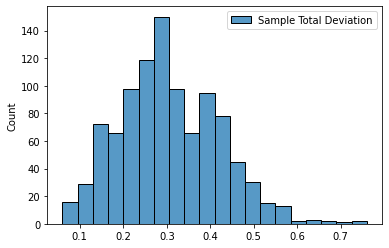

In [78]:
sns.histplot(data=result, bins=20)

<AxesSubplot:xlabel='Sample Total Deviation'>

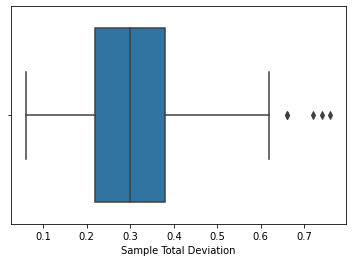

In [79]:
sns.boxplot(data=result, x='Sample Total Deviation')

In [80]:
sum(result.iloc[:, 0] > 0.5)

39

Note as I was prepping this class this result was bouncing around from 6 or 7% to 3.9% of the samples had a sample total deviation greater than 0.5. This indicates we should run the experiment more before trying to make a conclusion - if we are going to use 5% as our decision boundary.

## Note again that we observe sample variability decrease as sample size increases

Larger samples are more and more likely to look like the population (especially with replacement).

<AxesSubplot:ylabel='Count'>

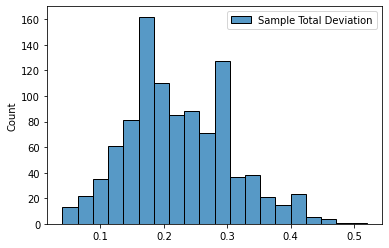

In [81]:
result = experiment(1000, s=50)
sns.histplot(data=result, bins=20)

<AxesSubplot:xlabel='Sample Total Deviation'>

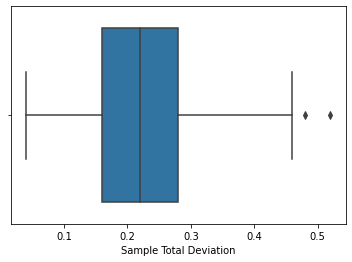

In [82]:
sns.boxplot(data=result, x='Sample Total Deviation')

In [83]:
result

,Sample Total Deviation
0,0.2
1,0.14
2,0.3
3,0.26
4,0.3
...,...
995,0.34
996,0.12
997,0.12
998,0.16
